# Introduction
This notebook is a personal exploration of an end-to-end data science process and serves as a learning process for myself as I continue to pursue a career in data science. <br>

The challenge is based on the Kaggle Titanic Competition that provides a dataset with different passenger attributes together with their survival status of the shipwreck. The aim is to develop a model capable of predicting passenger survival.



## Table of Contents 
Note: I can't get links to work 😡

[1. Exploratory Data Analysis](#explore) <br>
> [1.1 Preliminary observations](#prelim_explore) <br>
   [1.2 Exploring numerical attributes](#explore_num_columns) <br>
   [1.3 Exploring categorical attributes](#explore_cat_columns)  <br>
   [1.4 Univariate Analysis](#explore_cat_columns)  <br>
   [1.5 Bivariate Analysis](#explore_cat_columns)  <br>


### Imports

In [2]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Input

In [ ]:
# !unzip data/titanic.zip -d data/

test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")
pd.set_option("display.max_rows", None)

train:  (891, 12)
test:  (418, 11)


# 1. Exploratory Data Analysis
Objectives:
- Gain a preliminary understanding of available data
- Check for missing or null values
- Find potential outliers
- Assess correlations amongst attributes/features
- Check for data skew

[Back to contents](#top)

## 1.1 Preliminary observations
Examples from the dataset are shown below. <br><br>
[Back to contents](#top)

In [6]:
print("train: ", train_data.shape)
train_data.head(5)

train:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print("test: ", test_data.shape)
test_data.head(5)

test:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("Unique columns of train: ", set(train_data.columns) - set(test_data.columns))
print("Unique columns of test: ", set(test_data.columns) - set(train_data.columns))

Unique columns of train:  {'Survived'}
Unique columns of test:  set()


In [12]:
print(train_data.dtypes)
print(test_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Initial observations show that the test dataset holds the same attributes as the train dataset with "Survived" ommitted. Test data is likely a subset of an original dataset with all passengers included. (This is infact the case stated in the competition explanation. I still checked to simulate a scenario where this is unknown)

In [87]:
X = train_data.drop("Survived", axis=1)
y = train_data.Survived

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Numerical Columns from train_data

In [59]:
# List of numerical attributes
num_features = X.select_dtypes(exclude='object').copy()
num_features.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [60]:
len(num_features.columns)

6

In [61]:
num_features.describe().round(decimals=2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,2.31,29.70,0.52,0.38,32.20
std,257.35,0.84,14.53,1.10,0.81,49.69
min,1.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,2.00,20.12,0.00,0.00,7.91
50%,446.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,3.00,38.00,1.00,0.00,31.00
max,891.00,3.00,80.00,8.00,6.00,512.33


### Categorical Columns from train_data

In [62]:
# List of categorical attributes
cat_features = X.select_dtypes(include='object').copy()
cat_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [63]:
len(cat_features.columns)

5

In [64]:
cat_features.describe().round(decimals=2)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 1.2 Univariate Analysis

[Back to contents](#top)

### Target Column
First, it is good practice to evaluate the skew of the target column as it may adversely affect the outcome of the prediction accuracy of regression models. This is not required (or possible) for our dataset as the target is a binary variable.

Note: Correcting skew is important for Linear Regression, but not necessary for Decision Trees and Random Forests.

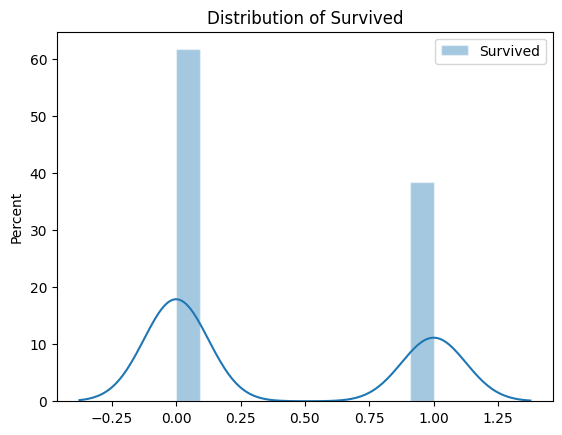

In [51]:
plt.figure()
sns.histplot(
    y, kde=True,
    stat="percent", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)
plt.title('Distribution of Survived')
plt.show()

### Numerical Features

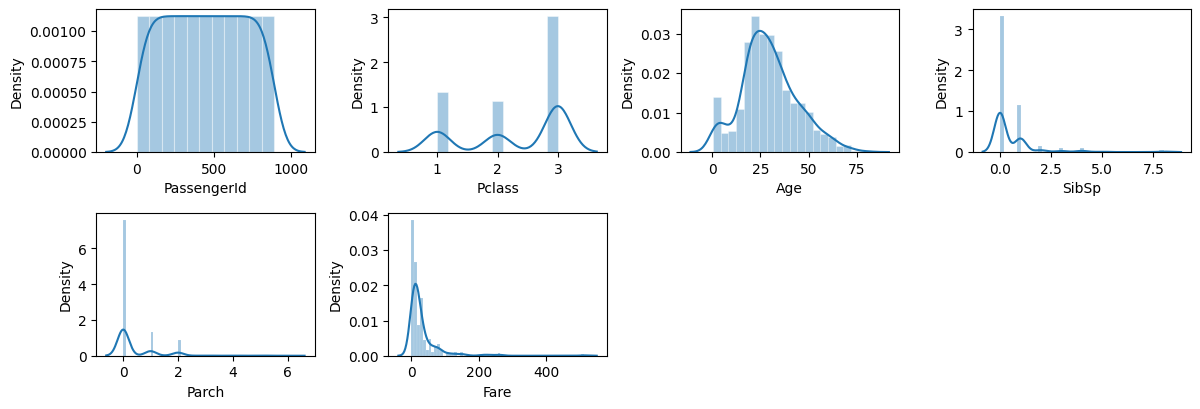

In [79]:
fig = plt.figure(figsize=(12,18))
for i in range(len(num_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.histplot(
    num_features.iloc[:,i].dropna(), kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)
    plt.xlabel(num_features.columns[i])

plt.tight_layout(pad=1.0)

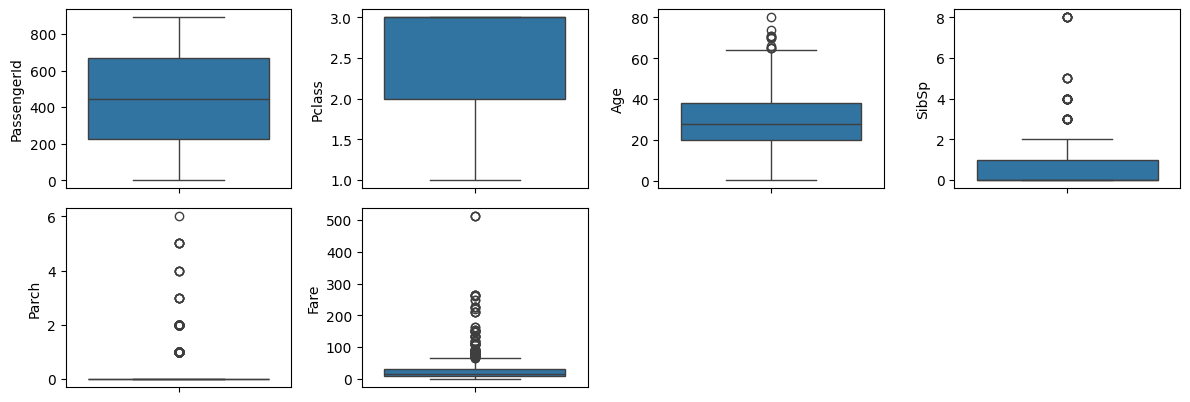

In [80]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_features.iloc[:,i])

plt.tight_layout()

### Categorical Features

## 1.3 Bivariate Analysis

[Back to contents](#top)

### Correlation Matrix

<Axes: title={'center': 'Correlation of numerical attributes'}>

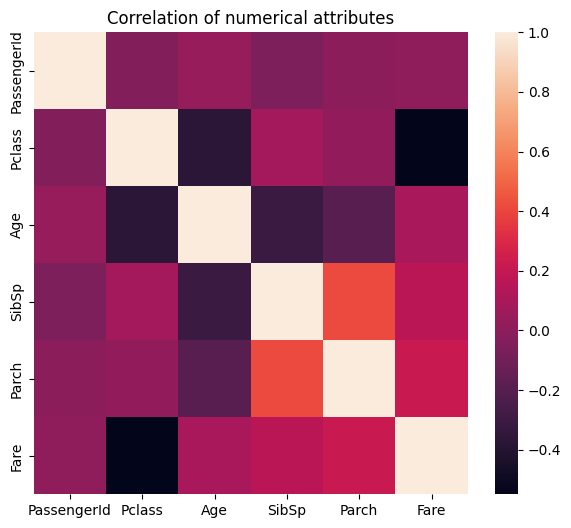

In [110]:
plt.figure(figsize=(7,6))
plt.title('Correlation of numerical attributes', size=12)
correlation = num_features.corr()
sns.heatmap(correlation)

### Correlation between numeric features and target

In [94]:
correlation = train_data.select_dtypes(exclude=['object']).corr()
correlation[['Survived']].sort_values(['Survived'], ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


### Scatterplot between numeric features and target

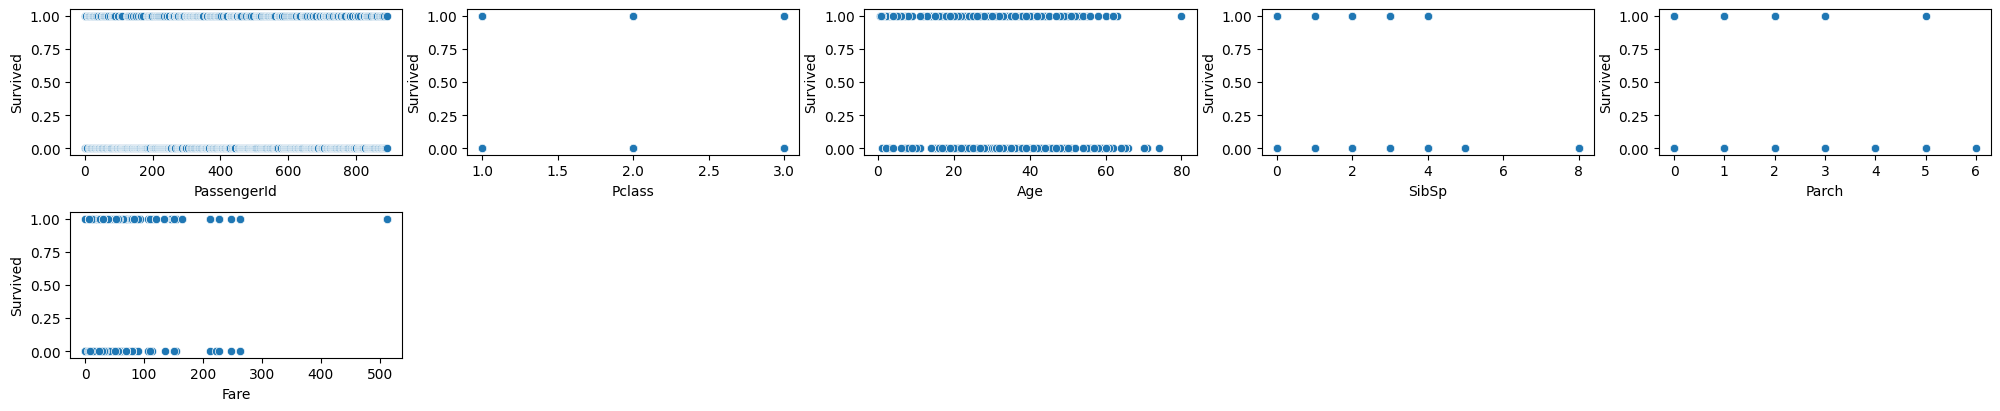

In [91]:
fig = plt.figure(figsize=(20,20))
for index in range(len(num_features.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=num_features.iloc[:,index], y=y, data=num_features.dropna())
fig.tight_layout(pad=1.0)